In [1]:
import pandas as pd
import FinanceDataReader as fdr

In [5]:
stock_dict = {
    "삼성전자": "005930",
    "SK하이닉스":"000660",
    "현대차":"005380",
    "셀트리온":"068270",
    "LG화학":"051910",
    "POSCO":"005490",
    "삼성물산":"028260",
    "NAVER":"035420",
}

In [6]:
type(stock_dict)

dict

In [7]:
stock_dict.keys()

dict_keys(['삼성전자', 'SK하이닉스', '현대차', '셀트리온', 'LG화학', 'POSCO', '삼성물산', 'NAVER'])

In [8]:
stock_dict.values()

dict_values(['005930', '000660', '005380', '068270', '051910', '005490', '028260', '035420'])

# 3. 여러 종목 종가 수집

* 종목 코드로 수집 가능
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 제작

In [16]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다
item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code,"2020","2021")['Close']
    item_list.append(close)

In [18]:
len(item_list)

8

## 3.1 하나의 데이터 프레임으로 합치기

In [21]:
# axis = 0 (행으로 붙이기)
# axis = 1 (열로 붙이기)
# 결측치 제외하기 join = "inner"

In [22]:
# 수집한 리스트를 axis = 1 (컬럼)을 기준으로 병합(concat)합니다
# 이때, 컬럼은 stock_dict의 key 값을 사용합니다
df = pd.concat(item_list, axis = 1)
df.columns = stock_dict.keys()
df

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-01-02,55200,94700,118000,176762,314000,236000,107500,182500
2020-01-03,55500,94500,116000,174307,311000,237000,107500,181500
2020-01-06,55500,94300,116000,169888,307000,231000,106000,180500
2020-01-07,55800,94000,115500,174798,311000,232000,108000,187000
2020-01-08,56800,97400,112000,169888,302000,228000,105000,183000
...,...,...,...,...,...,...,...,...
2020-12-23,73900,116000,185000,348613,806000,267500,137000,284000
2020-12-24,77800,118000,187000,341248,818000,271000,139000,282000
2020-12-28,78700,115500,189500,327500,814000,273500,140000,281000


## 3.2 시각화를 위한 폰트 설정

In [23]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [24]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다
get_font_family()

'Malgun Gothic'

In [25]:
# 시각화를 위한 폰트 설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다
import matplotlib.pyplot as plt

font_family = get_font_family()
# 폰트 설정
plt.rc("font", family = font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus = False)

# ggplot 으로 그래프 스타일 설정
plt.style.use("ggplot")
# 다른 스타일도 있음. plt.style.use <- 검색해서 알아볼것임

# 그래프에 retina display 적용
# retina display가 있는 노트북에서 사용가능함( 잘보이는 효과.. )
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

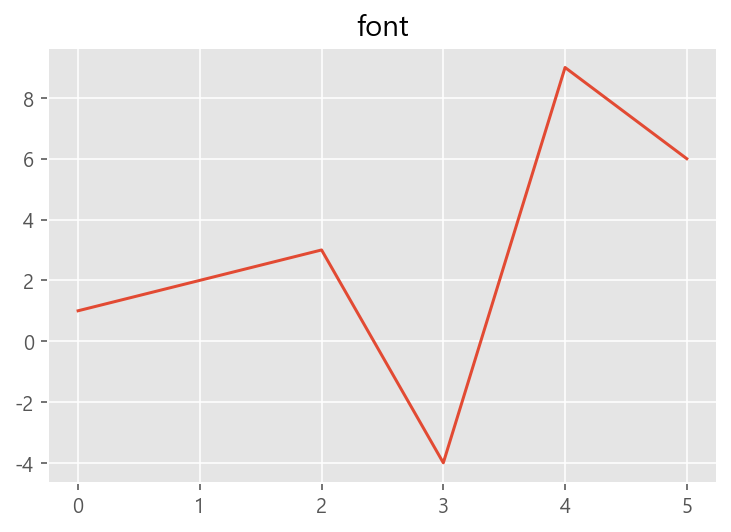

In [29]:
pd.Series([1,2,3,-4,9,6]).plot(title="font")

# 4. 여러 종목 한번에 시각화 하기

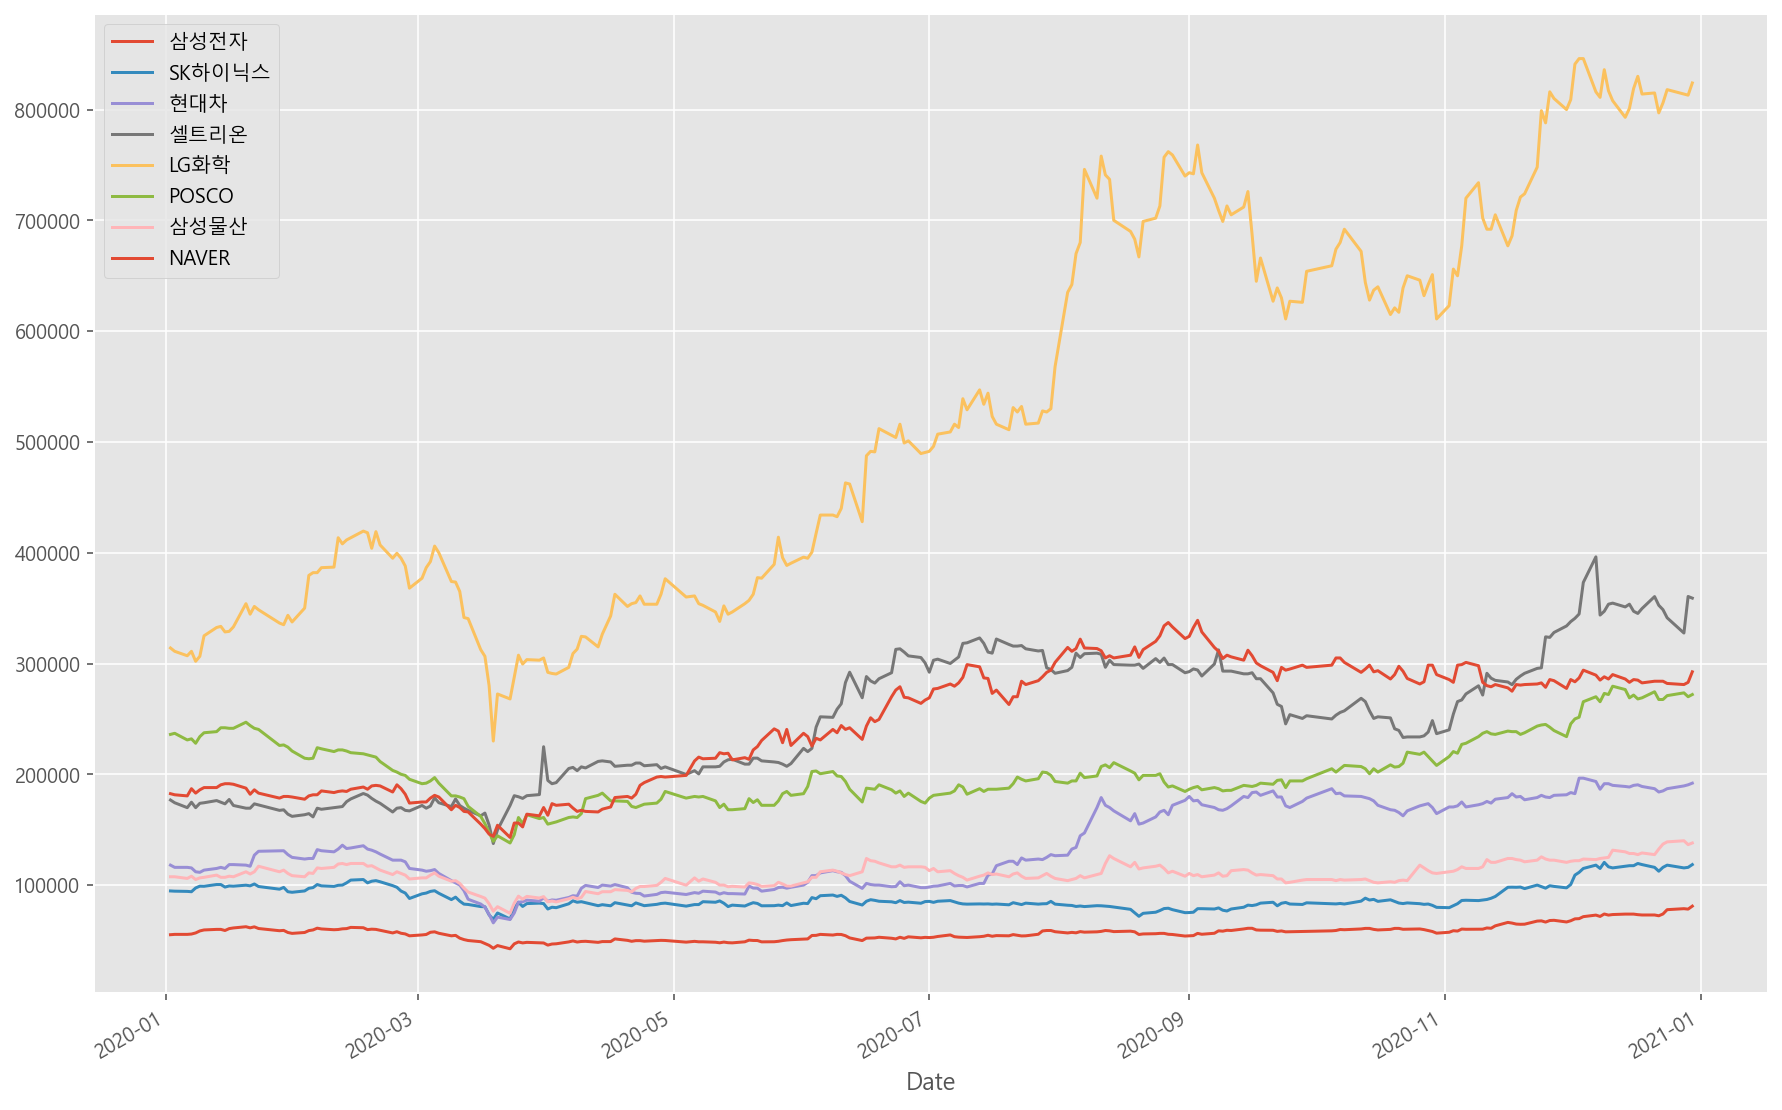

In [33]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot(figsize = (15,10))

# 5. 2축 그래프 사용하기

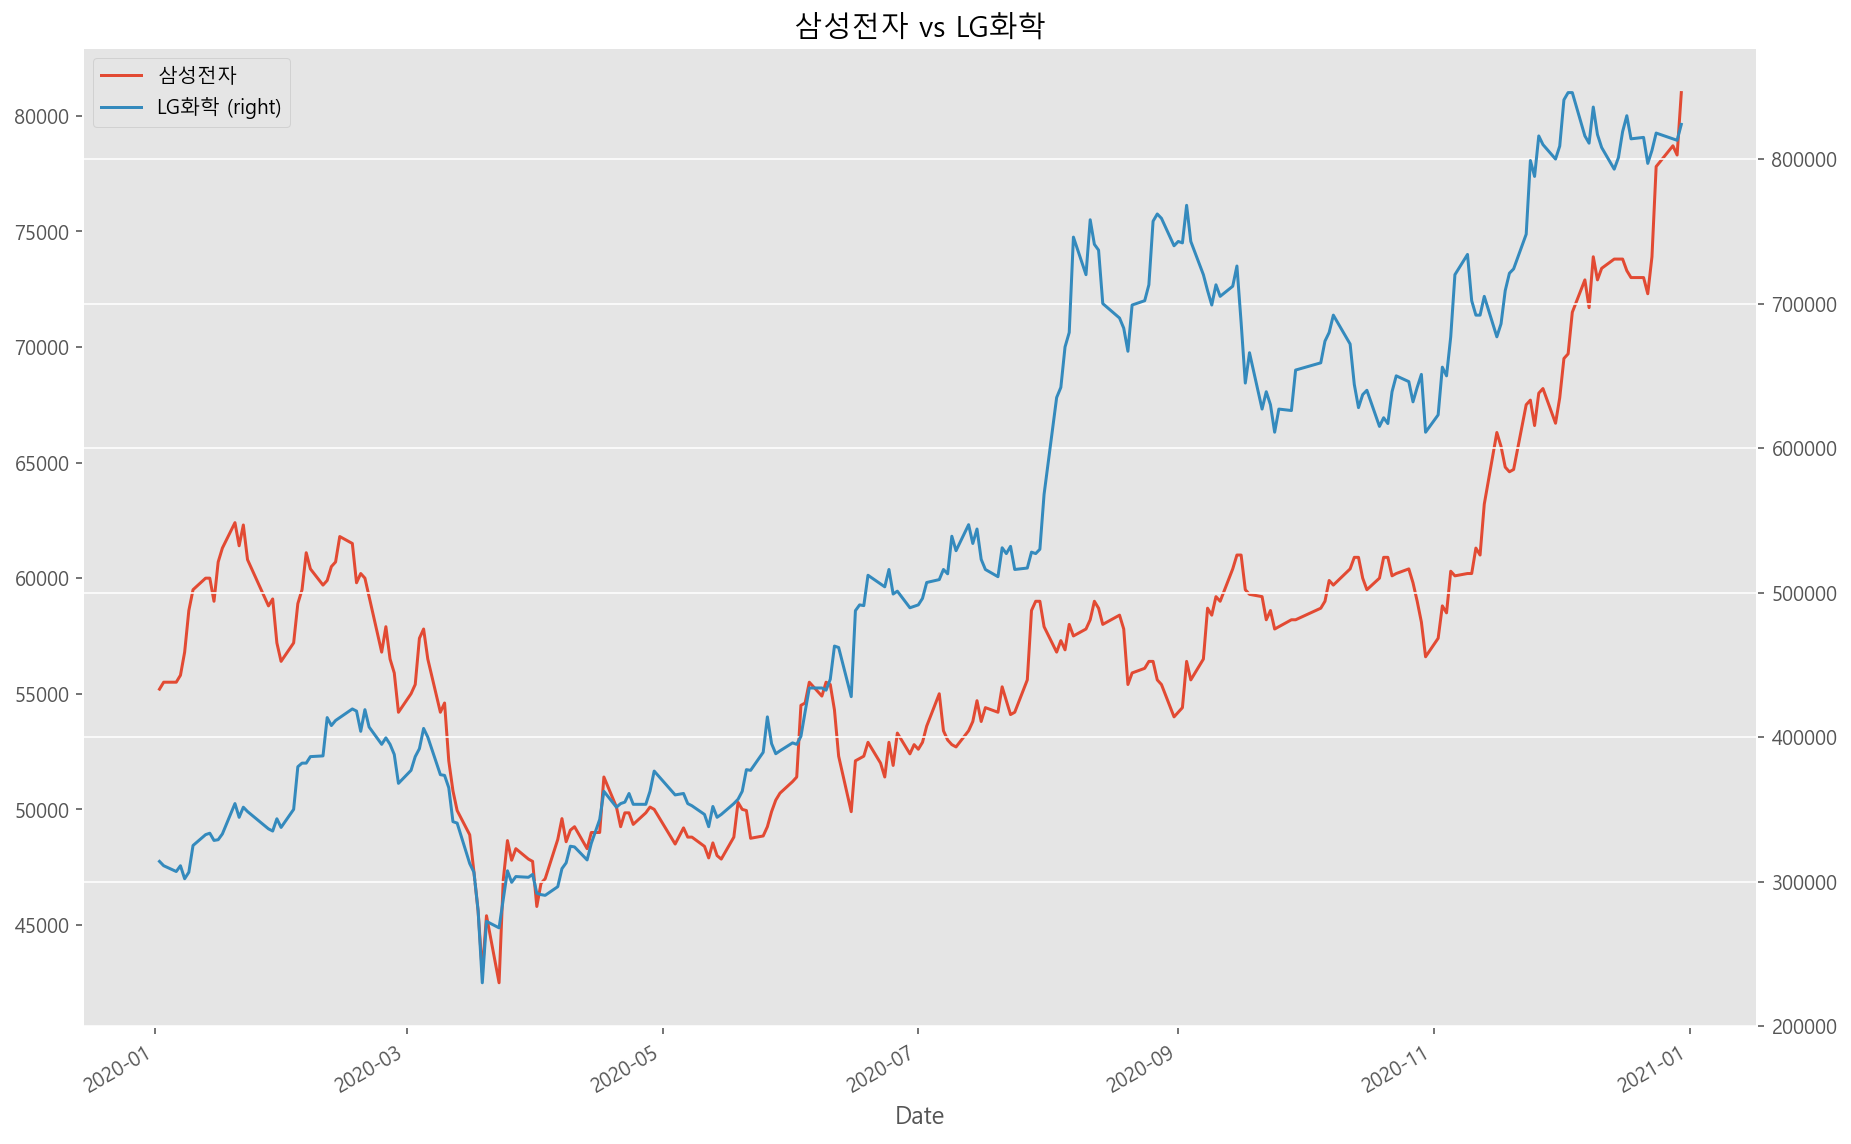

In [37]:
# 2개의 종목 비교하기 , 삼성전자 / LG화학
df[["삼성전자", "LG화학"]].plot(secondary_y = "LG화학", figsize = (15,10), title = "삼성전자 vs LG화학")

# 6. 기간 수익률 비교하기

* 가격마다 스케일이 다르기 때문에 데이터 프레임 기준으로 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대해 알아본다
* 다른 스케일 값의 상승 / 하락 비율을 비교해 볼 수 있도록한다
* 다른 스케일의 값을 조장할 때 표준화 혹은 정규화 방법을 사용하기도 함
    * 표준화(standardization):
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization):
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)

In [42]:
# df2 변수에 lg화학과 삼성전자만 따로 가져옴
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있음 (첫날은 1이므로 첫날을 빼주는것)
# df_plot에 수익률을 담아줍니다.
df2 = df[["LG화학","삼성전자"]]
df_plot = df2 / df2.iloc[0] - 1
df_plot

,LG화학,삼성전자
Date,,
2020-01-02,0.000000,0.000000
2020-01-03,-0.009554,0.005435
2020-01-06,-0.022293,0.005435
2020-01-07,-0.009554,0.010870
2020-01-08,-0.038217,0.028986
...,...,...
2020-12-23,1.566879,0.338768
2020-12-24,1.605096,0.409420
2020-12-28,1.592357,0.425725


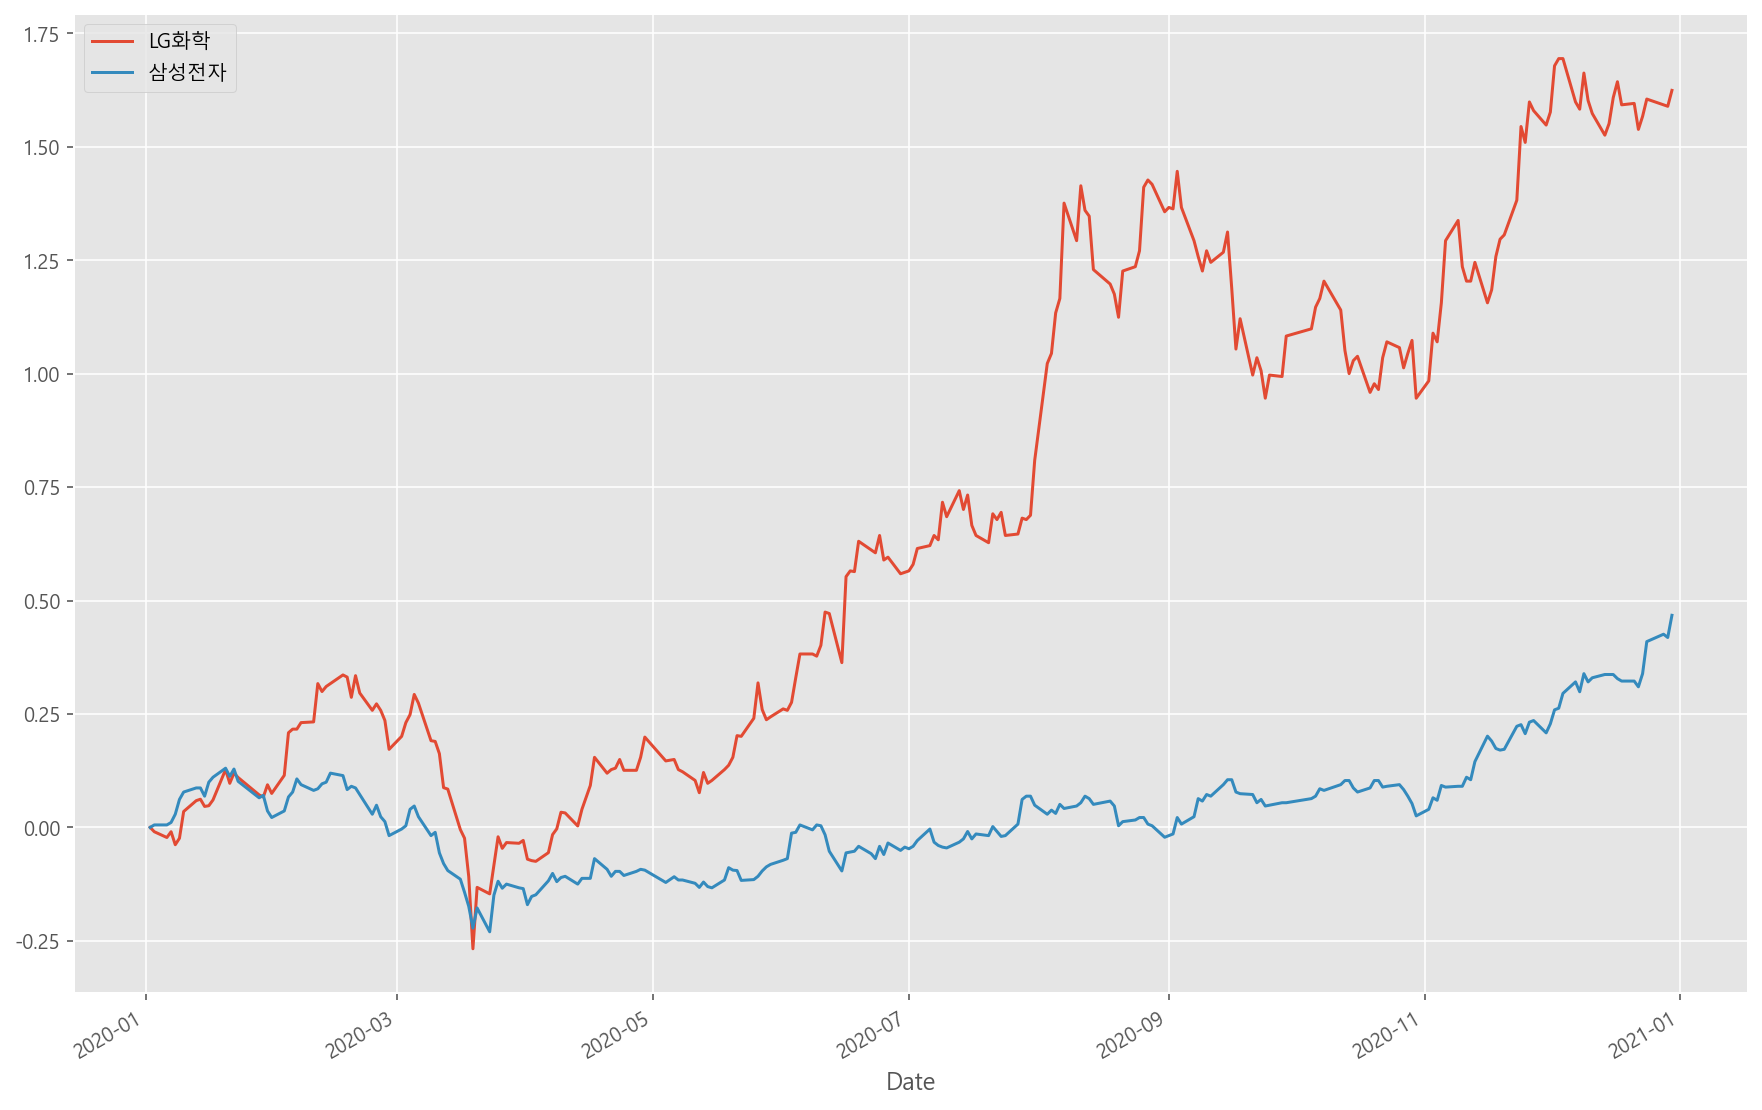

In [44]:
# 수익률 시각화
df_plot.plot(figsize = (15,10))

# pyplot의 subplots로 서브 플롯 그리기

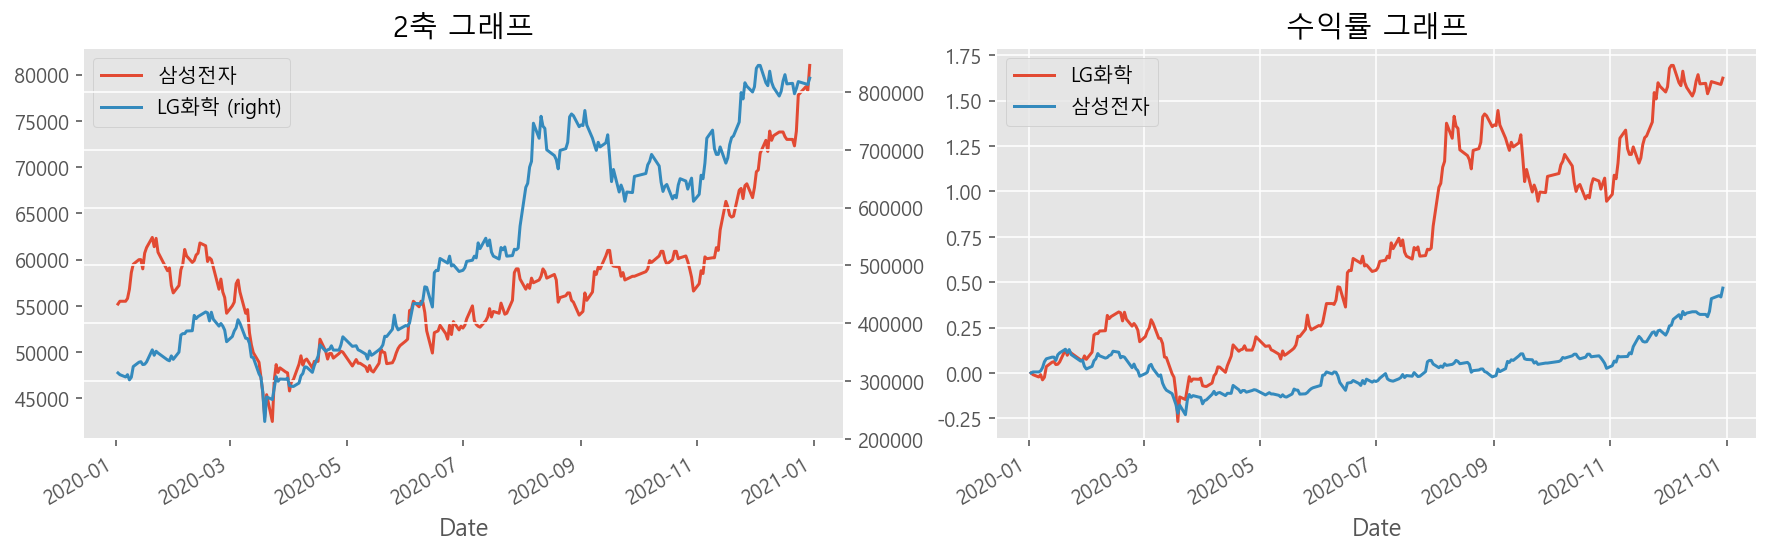

In [52]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축 그래프와 수익률 그래프를 비교해 봅니다

fig, axes = plt.subplots(1, 2, figsize = (15,4))
df[["삼성전자", "LG화학"]].plot(secondary_y = "LG화학", ax = axes[0], title = "2축 그래프")
df_plot.plot(ax = axes[1], title = "수익률 그래프")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFD4FBEB20>,
      dtype=object)

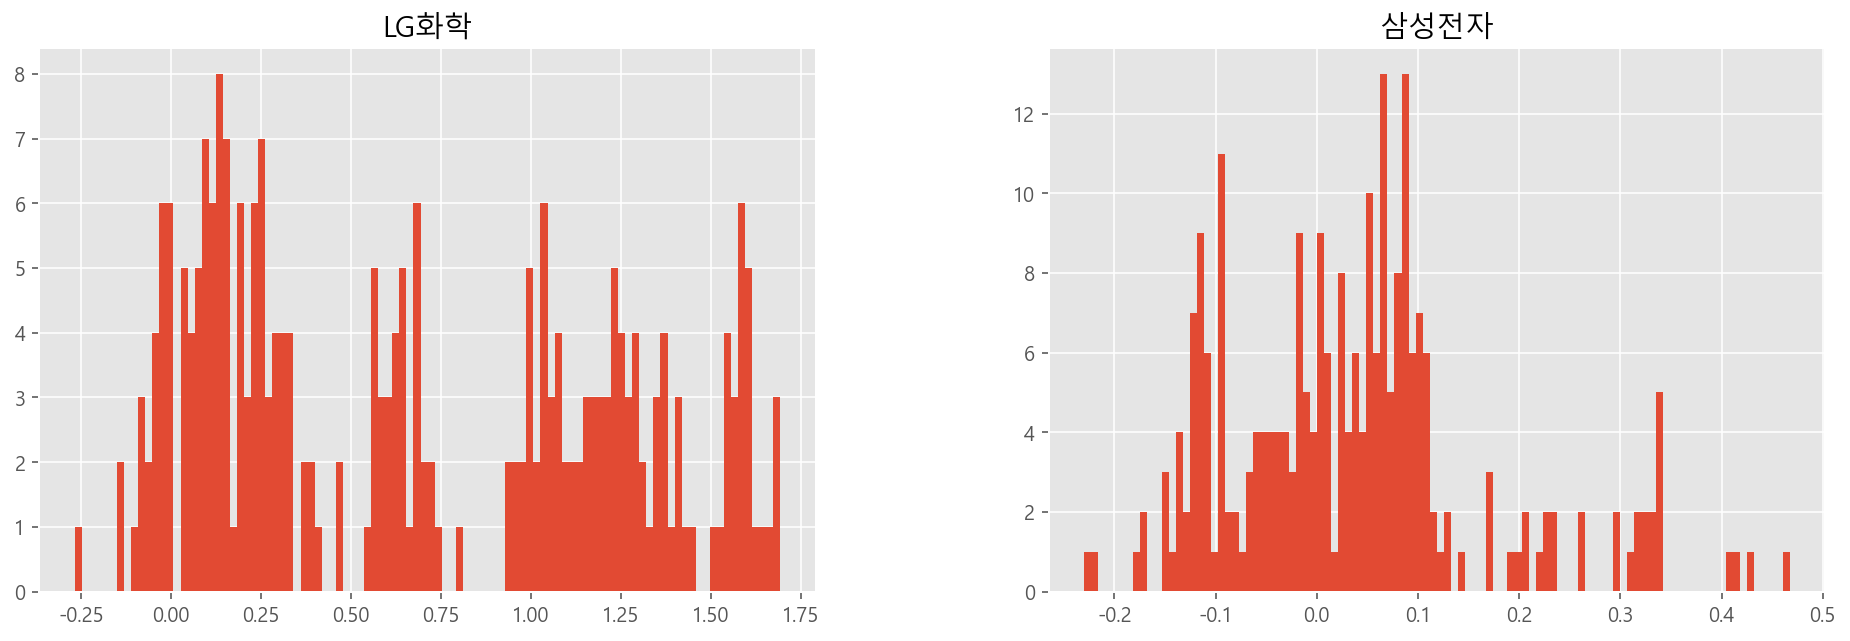

In [59]:
# df_plot 데이터 프레임을 통해 수익률의 분포를 히스토그램으로 시각화합니다
# 
h = df_plot.hist(figsize = (16,5), bins = 100)
h

# 8. 전체 데이터 프레임 값에 대한 수익률 계산하기

In [63]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있음
df_norm = df / df.iloc[0] - 1
df_norm

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.005435,-0.002112,-0.016949,-0.013889,-0.009554,0.004237,0.000000,-0.005479
2020-01-06,0.005435,-0.004224,-0.016949,-0.038888,-0.022293,-0.021186,-0.013953,-0.010959
2020-01-07,0.010870,-0.007392,-0.021186,-0.011111,-0.009554,-0.016949,0.004651,0.024658
2020-01-08,0.028986,0.028511,-0.050847,-0.038888,-0.038217,-0.033898,-0.023256,0.002740
...,...,...,...,...,...,...,...,...
2020-12-23,0.338768,0.224921,0.567797,0.972217,1.566879,0.133475,0.274419,0.556164
2020-12-24,0.409420,0.246040,0.584746,0.930551,1.605096,0.148305,0.293023,0.545205
2020-12-28,0.425725,0.219641,0.605932,0.852774,1.592357,0.158898,0.302326,0.539726


## 8.1 전체 종목의 수익률 시각화

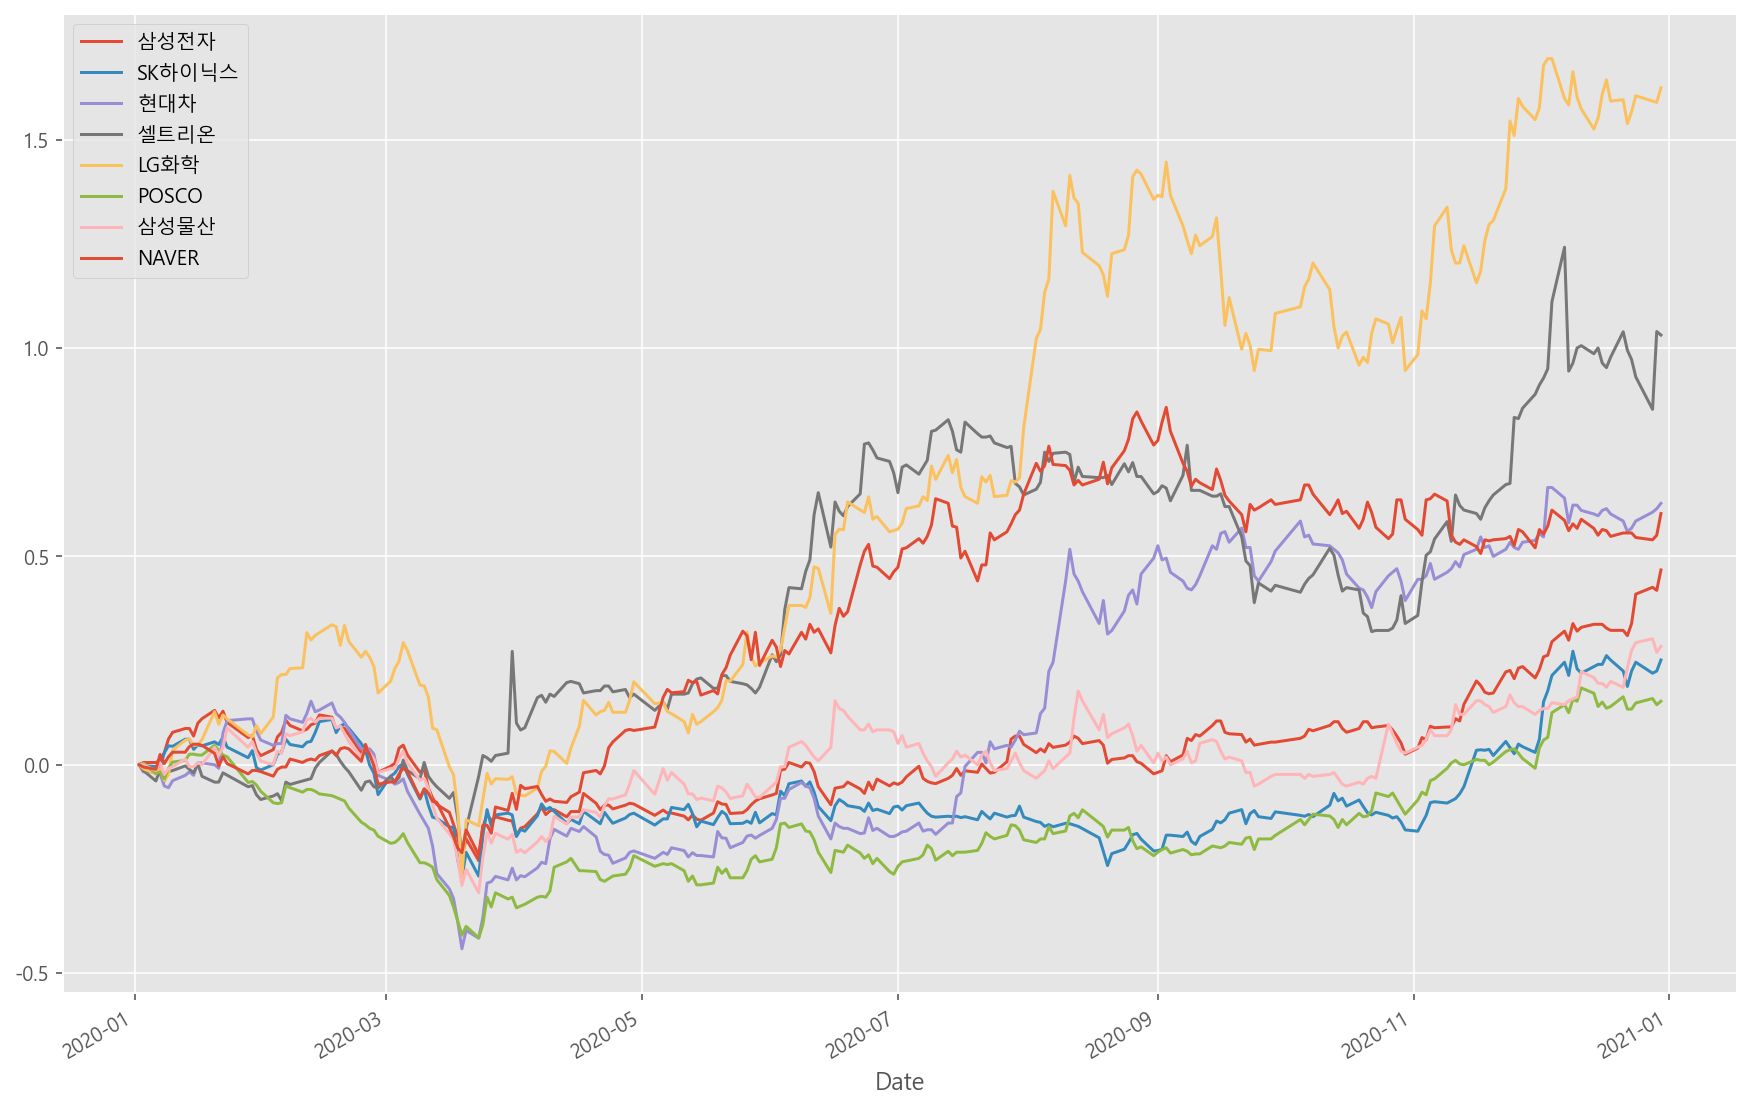

In [66]:
# df_norm 변수에 담긴 전체  종목에 대한 수익률을 시각화
df_norm.plot(figsize = (15,10))

In [67]:
# 계산된 수익률에 대한 기술 통계값 구하기
df_norm.describe()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,0.035385,-0.061919,0.138853,0.413476,0.678992,-0.138959,0.017393,0.348862
std,0.127932,0.115102,0.314121,0.345339,0.559427,0.128907,0.103888,0.301454
min,-0.230072,-0.271383,-0.441525,-0.222225,-0.267516,-0.415254,-0.306977,-0.216438
25%,-0.052989,-0.134108,-0.155932,0.087499,0.149682,-0.225106,-0.032558,0.021918
50%,0.028986,-0.109293,0.052966,0.431940,0.617834,-0.169492,0.013953,0.479452
75%,0.088768,0.005808,0.461864,0.692359,1.190287,-0.062500,0.080233,0.600000
max,0.467391,0.272439,0.665254,1.241664,1.694268,0.184322,0.302326,0.857534


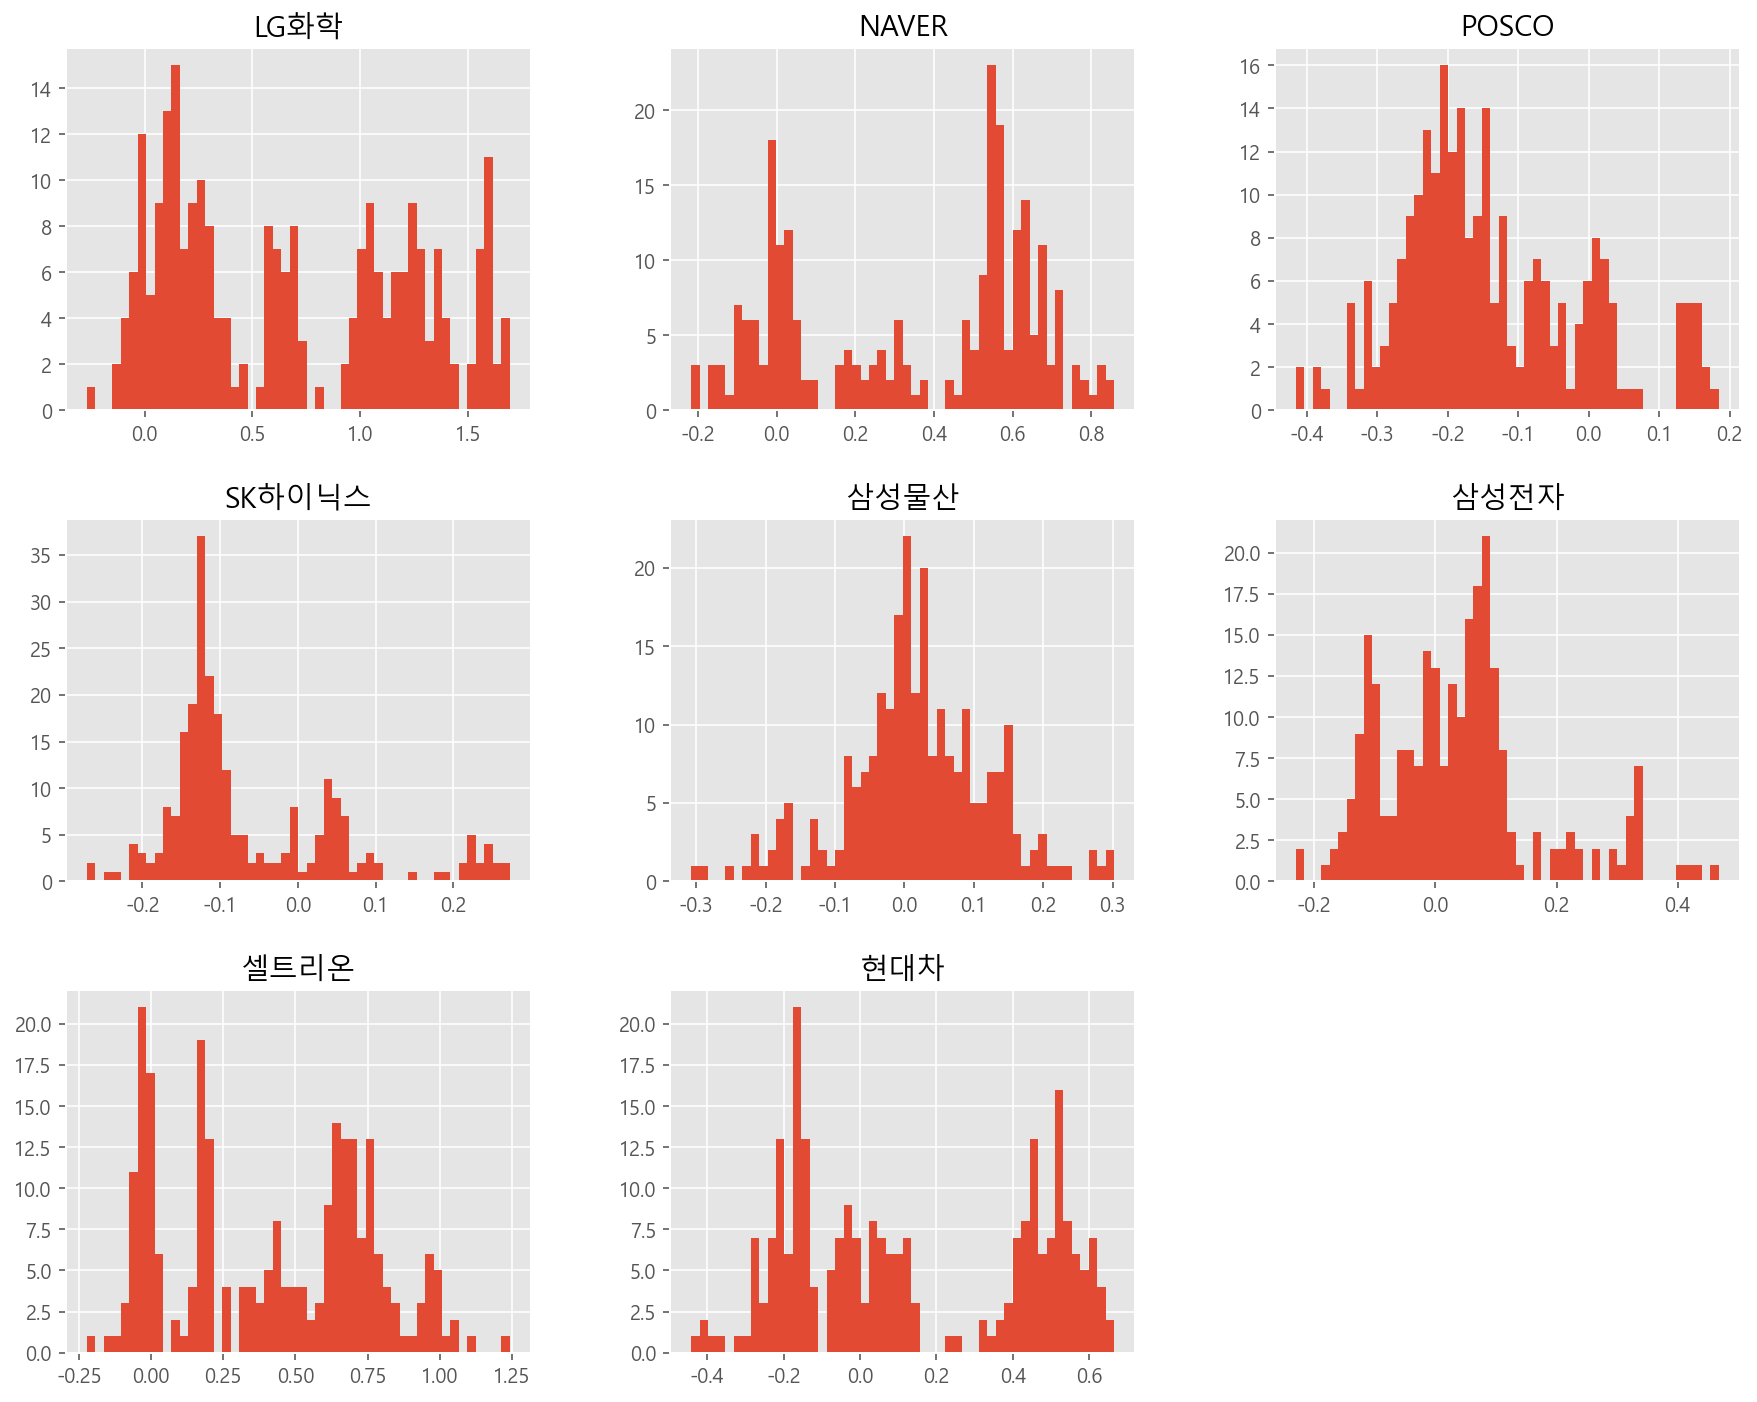

In [78]:
# 수익률에 대한 히스토그램 그리기
h = df_norm.hist(figsize = (15,12), bins = 50)

# 9. 왜도와 첨도

In [79]:
# 왜도를 구한다
df_norm.skew()

삼성전자      0.860397
SK하이닉스    1.229166
현대차       0.174059
셀트리온      0.046506
LG화학      0.244831
POSCO     0.601748
삼성물산     -0.175907
NAVER    -0.271592
dtype: float64

## 9.2 첨도

* 얼마나 중심에 모여있는가
* 첨도값 (K) 가 3에 가까우면 산포도가 정규 분포에 가깝다
* 3보다 작을 경우에는 (K < 3) 정규 분포보다 더 완만하게 납작한 분포로 판단 할 수 있으며
* 첨도값이 (K > 3) 이면 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있음

In [83]:
# kurt 로 첨도를 구합니다
df_norm.kurt()

삼성전자      0.940228
SK하이닉스    0.951988
현대차      -1.502115
셀트리온     -1.242033
LG화학     -1.375776
POSCO    -0.115173
삼성물산      0.680725
NAVER    -1.448779
dtype: float64